#**Project 2** : Customer Segmentation Analysis
* Dataset Name : Marketing Analytics
* Dataset Link : https://www.kaggle.com/datasets/jackdaoud/marketing-data

---
# Data Loading and Data Cleaning

In [42]:
# import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
#Load the Dataset
df = pd.read_csv('ifood_df.csv')
#Understand the dataset
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [44]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [46]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [47]:
df.fillna(method='ffill', inplace=True)

In [48]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


---
# Descriptive Statistics

In [49]:
# Calculate average purchase values
average_purchase_value = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Frequency of purchases
purchase_frequencies = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

#Print
print("Average Purchase Values:",average_purchase_value )
print("\nPurchase Frequencies:", purchase_frequencies)

Average Purchase Values: MntWines            306.164626
MntFruits            26.403175
MntMeatProducts     165.312018
MntFishProducts      37.756463
MntSweetProducts     27.128345
MntGoldProds         44.057143
dtype: float64

Purchase Frequencies: NumDealsPurchases      2.318367
NumWebPurchases        4.100680
NumCatalogPurchases    2.645351
NumStorePurchases      5.823583
dtype: float64


---
# Customer Segmentation


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = df[['Income', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Example with 4 clusters
df['Cluster'] = kmeans.fit_predict(scaled_features)


---
# Visualization

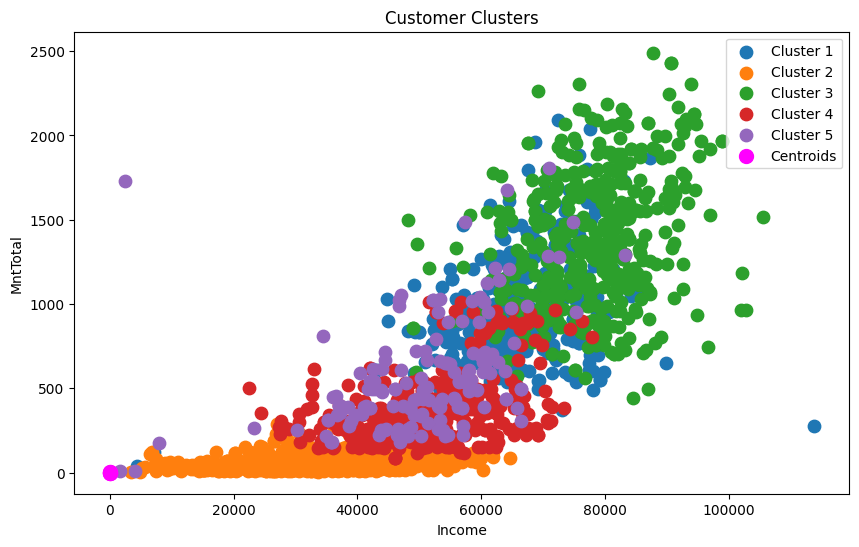

In [51]:
# Apply K-means clustering with the desired number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster_num in range(5):
    plt.scatter(df.loc[df['Cluster'] == cluster_num, 'Income'], df.loc[df['Cluster'] == cluster_num, 'MntTotal'],s=80, label=f'Cluster {cluster_num + 1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=100, c='magenta', label='Centroids')

# Adding titles and labels
plt.title("Customer Clusters")
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend()
plt.show()


---
# Insights


In [52]:
# Analyze characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        65597.327273  0.109091  0.772727  47.875758  579.542424  45.615152   
1        32074.390845  0.805164  0.424883  48.514085   23.869718   4.197183   
2        77516.636364  0.029598  0.147992  50.171247  667.655391  63.101480   
3        51502.971576  0.317829  0.733850  49.439276  223.335917  17.470284   
4        50645.404908  0.711656  0.895706  49.496933  375.920245  18.294479   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             217.245455        58.424242         46.587879     69.457576   
1              16.016432         5.897887          4.341549     13.293427   
2             475.431290        94.498943         64.947146     76.816068   
3              85.245478        24.842377         17.400517  

In [53]:
# insights
for cluster in cluster_summary.index:
    print(f"Cluster {cluster} characteristics:")
    print(cluster_summary.loc[cluster])
    print("\n")

Cluster 0 characteristics:
Income                  65597.327273
Kidhome                     0.109091
Teenhome                    0.772727
Recency                    47.875758
MntWines                  579.542424
MntFruits                  45.615152
MntMeatProducts           217.245455
MntFishProducts            58.424242
MntSweetProducts           46.587879
MntGoldProds               69.457576
NumDealsPurchases           2.536364
NumWebPurchases             7.706061
NumCatalogPurchases         3.869697
NumStorePurchases           9.648485
NumWebVisitsMonth           5.039394
AcceptedCmp3                0.078788
AcceptedCmp4                0.127273
AcceptedCmp5                0.048485
AcceptedCmp1                0.048485
AcceptedCmp2                0.021212
Complain                    0.006061
Z_CostContact               3.000000
Z_Revenue                  11.000000
Response                    0.118182
Age                        54.566667
Customer_Days            2557.942424
marital_Div

# Recommendations
* Provide recommendations based on insights
 - Target high-income customers with personalized promotions.
 - Offer discounts on frequently purchased items to frequent shoppers.